## Coding activity 3: The Bias-Variance Decomposition

In [2]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt

We continue with our running exaple, in which
$$
r(x) := \frac x2\cos(4\pi x),
$$
and $Y_i$ is drawn uniformly at random from $N(r(x_i), 0.1)$.

In [3]:
def r(x):
    """A convenience function to compute values of r."""
    return 0.5*x*np.cos(4*np.pi*x)

def make_y(x):
    """A convenience function to sample from N(r(x), 0.1)."""
    return r(x) + 0.1*np.random.normal(size=len(x))

- For our running synthetic example, plot 
$$
    R(\hat r_k, r),\; \text{Var}\, \hat r_k,\; \text{and}\; \text{Bias}(\hat r_k, r)^2
$$
versus $k$ on the same axes.

- Verify the integrated bias-variance decomposition using your computed
$R(\hat r_k, r)$, $\text{Var}\, \hat r_k$, and $\text{Bias}(\hat r_k, r)^2$.

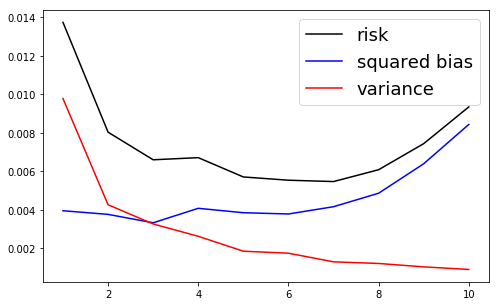

In [4]:
np.random.seed(668)
n = 50
k = 4

X = np.sort(np.random.uniform(size=n))
x = np.arange(0, 1, 0.001)
rx = r(x)
rX = r(X)

risks = [] # Collect average risks for k=1,...,10 in here.
squared_biases = [] # Collect squared biases for k=1,...,10 in here.
variances = [] # Collect variances for k=1,...,10 in here.

for k in range(1, 11):
    
    losses = []
    smoothers = []
    for j in range(50):
        
        R = KNeighborsRegressor(n_neighbors=k)
        R.fit(X.reshape(-1, 1), make_y(X))

        y_ = R.predict(x.reshape(-1, 1))
        
        smoothers.append(y_)
        
        loss = (rx - y_)**2
        losses.append(loss)
        
    squared_bias = np.mean((np.mean(smoothers, axis=0) - rx)**2)
    squared_biases.append(squared_bias)
    
    variance = np.mean(np.var(smoothers, axis=0))
    variances.append(variance)
    
    risk = np.mean(losses)
    risks.append(risk)

risks = np.array(risks)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), risks, 'k', label="risk")
plt.plot(range(1, 11), squared_biases, 'b', label="squared bias")
plt.plot(range(1, 11), variances, 'r', label="variance")
# plt.plot(range(1, 11), np.array(variances) + np.array(squared_biases), 'g')
plt.legend(fontsize=18)
plt.show()